#Importação de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score

#Leitura dos dados

In [2]:
df = pd.read_csv("/content/dados_tratados.csv")

#Remoção de Colunas Irrelevantes

In [3]:
# Remover identificador
df = df.drop(columns=['customerID'])

# (Opcional) removendo coluna derivada
df = df.drop(columns=['Contas_Diarias'])

#Encoding

In [4]:
df.dtypes

,0
Churn,float64
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,int64
customer_Dependents,int64
customer_tenure,int64
phone_PhoneService,int64
phone_MultipleLines,int64
internet_InternetService,object
internet_OnlineSecurity,int64


In [5]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [6]:
import pandas as pd

# Separar variáveis categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

In [7]:
df_encoded.shape
df_encoded.head()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,...,account_Charges.Monthly,account_Charges.Total,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0,0,1,0,...,65.6,593.30,False,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,1,0,0,0,...,59.9,542.40,True,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,0,0,0,1,...,73.9,280.85,True,True,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0,0,1,1,...,98.0,1237.85,True,True,False,False,False,False,True,False
4,1.0,1,1,0,3,1,0,0,0,0,...,83.9,267.40,False,True,False,False,False,False,False,True


#Verificação da Proporção de Evasão

In [8]:
# Contagem absoluta
df['Churn'].value_counts()

# Proporção percentual
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [9]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(class_weight='balanced')

In [10]:
df_encoded['Churn'].unique()
df_encoded['Churn'].isnull().sum()

np.int64(224)

In [11]:
df_encoded = df_encoded.dropna(subset=['Churn'])

In [12]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [14]:
df_encoded = df_encoded.dropna(subset=['Churn'])

In [15]:
print("NaN em X:", X.isnull().sum().sum())
print("NaN em y:", y.isnull().sum())

NaN em X: 11
NaN em y: 0


In [16]:
X.isnull().sum().sort_values(ascending=False)

,0
account_Charges.Total,11
customer_Partner,0
customer_SeniorCitizen,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
customer_Dependents,0
internet_OnlineSecurity,0
internet_OnlineBackup,0
internet_TechSupport,0


In [17]:
df_encoded = df_encoded.dropna()

In [18]:
print(X.isnull().sum().sum())

11


In [19]:
scaler = StandardScaler()

# Ajusta apenas no treino
X_train_scaled = scaler.fit_transform(X_train)

# Aplica no teste
X_test_scaled = scaler.transform(X_test)

#Análise de Correlação


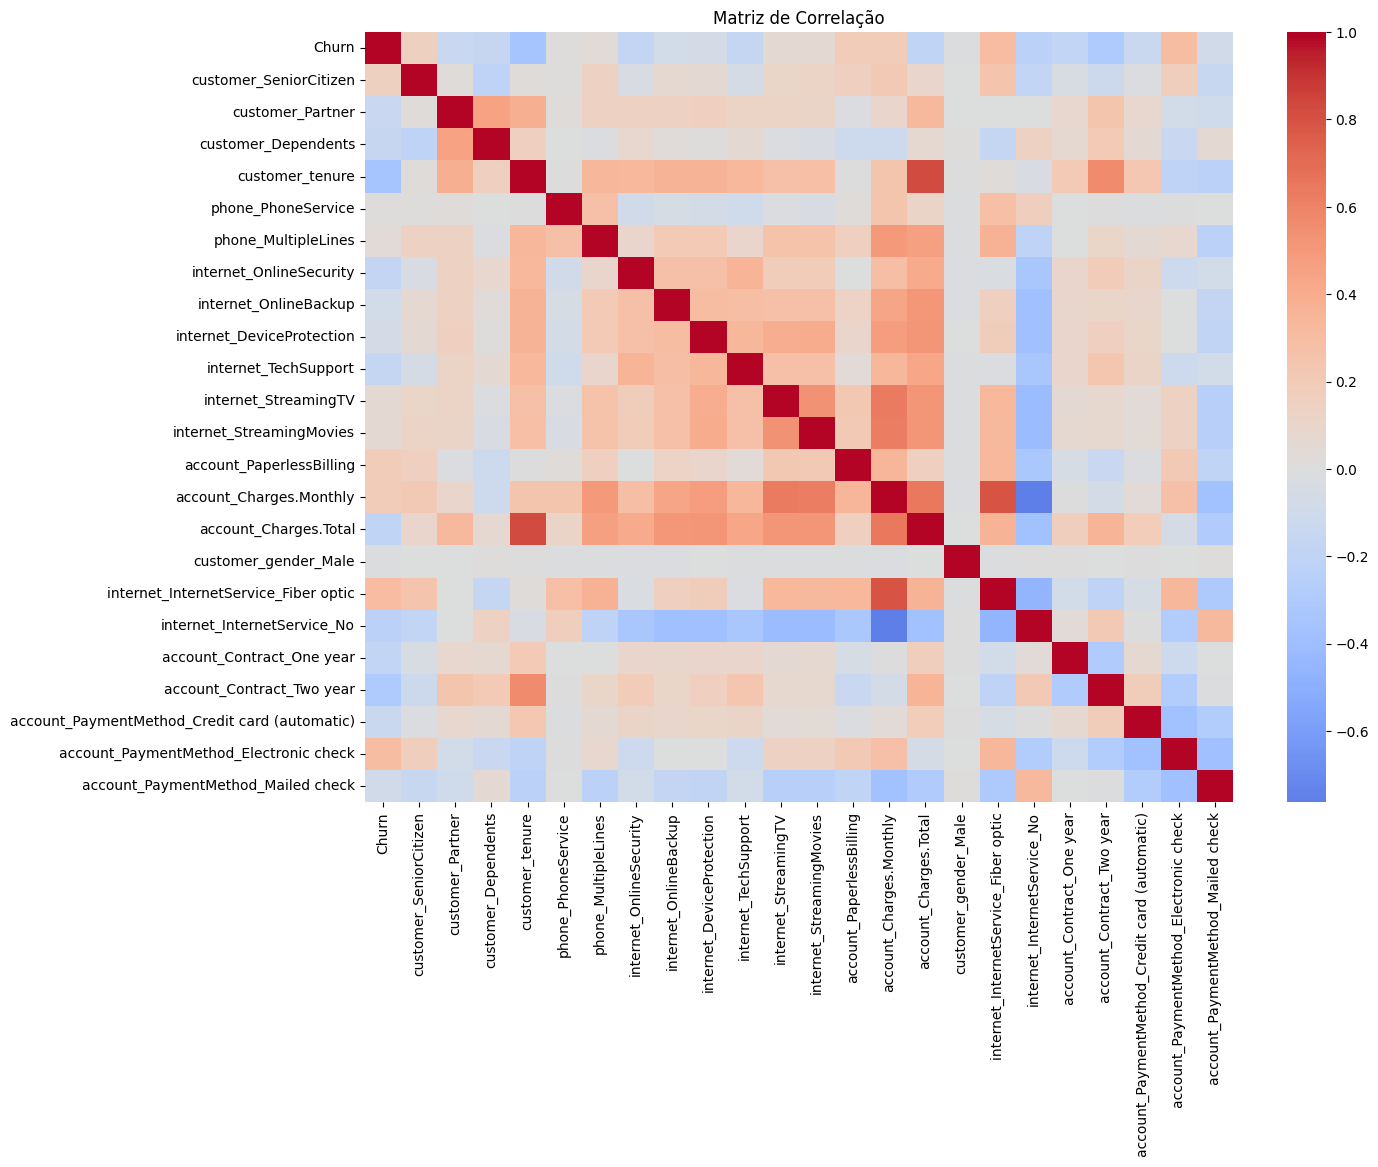

In [20]:
# Matriz de correlação
correlation_matrix = df_encoded.corr()

# Plot
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

#Análises Direcionadas

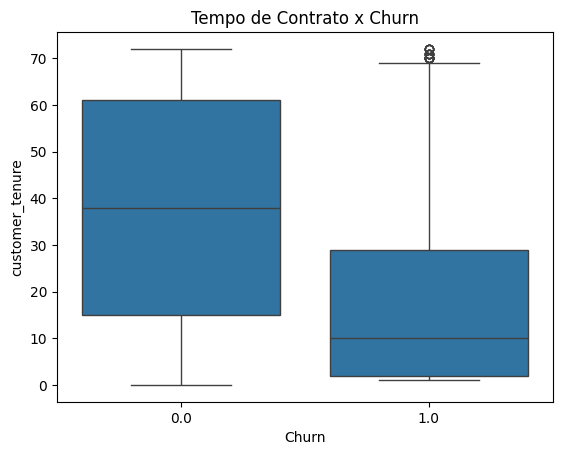

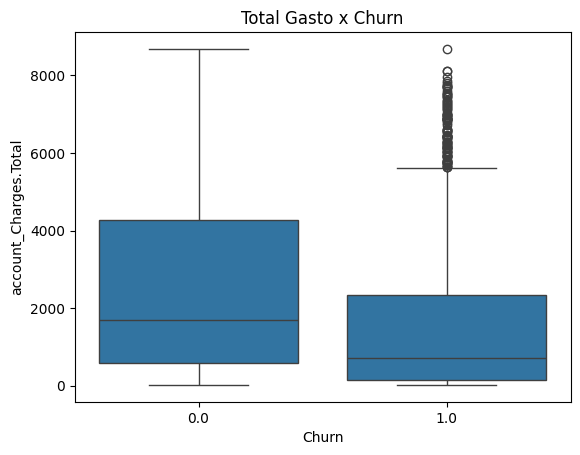

In [21]:
plt.figure()
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Tempo de Contrato x Churn')
plt.show()

plt.figure()
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Total Gasto x Churn')
plt.show()

#Separação de dados

In [22]:
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

print("\nProporção no treino:")
print(y_train.value_counts(normalize=True))

print("\nProporção no teste:")
print(y_test.value_counts(normalize=True))

Treino: (4930, 23)
Teste: (2113, 23)

Proporção no treino:
Churn
0.0    0.734686
1.0    0.265314
Name: proportion, dtype: float64

Proporção no teste:
Churn
0.0    0.734501
1.0    0.265499
Name: proportion, dtype: float64


##Criação de Modelos

In [23]:
#Regressão Logística ou KNH

# Separar tipos de colunas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Pipeline numérica
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline categórica
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Pipeline completa
pipeline_log = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Treinar
pipeline_log.fit(X_train, y_train)

# Prever
y_pred_log = pipeline_log.predict(X_test)
y_prob_log = pipeline_log.predict_proba(X_test)[:, 1]

# Avaliar
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

=== Regressão Logística ===
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1552
         1.0       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113

ROC-AUC: 0.8334947029420954


In [24]:
# Random Forest

# Separar tipos de colunas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Pipeline numérica (sem scaler)
num_pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Pipeline categórica
cat_pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# ColumnTransformer
preprocessor_rf = ColumnTransformer([
    ('num', num_pipeline_rf, num_cols),
    ('cat', cat_pipeline_rf, cat_cols)
])

# Pipeline completa
pipeline_rf = Pipeline([
    ('preprocess', preprocessor_rf),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

# Treinar
pipeline_rf.fit(X_train, y_train)

# Prever
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Avaliar
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1552
         1.0       0.60      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113

ROC-AUC: 0.809822183325064


#Avaliação dos Modelos

In [25]:
#Avaliação – Regressão Logística

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Métricas - Teste
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print("=== Regressão Logística ===")
print("Acurácia:", acc_log)
print("Precisão:", prec_log)
print("Recall:", rec_log)
print("F1-score:", f1_log)
print("Matriz de Confusão:\n", cm_log)

=== Regressão Logística ===
Acurácia: 0.7941315664931378
Precisão: 0.6418918918918919
Recall: 0.5080213903743316
F1-score: 0.5671641791044776
Matriz de Confusão:
 [[1393  159]
 [ 276  285]]


In [26]:
#Avaliação – Random Forest

# Métricas - Teste
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n=== Random Forest ===")
print("Acurácia:", acc_rf)
print("Precisão:", prec_rf)
print("Recall:", rec_rf)
print("F1-score:", f1_rf)
print("Matriz de Confusão:\n", cm_rf)


=== Random Forest ===
Acurácia: 0.7766209181258874
Precisão: 0.6018306636155606
Recall: 0.46880570409982175
F1-score: 0.5270541082164328
Matriz de Confusão:
 [[1378  174]
 [ 298  263]]


In [27]:
#Regressão logística
y_train_pred_log = pipeline_log.predict(X_train)

print("Accuracy Treino (Log):", accuracy_score(y_train, y_train_pred_log))
print("Accuracy Teste (Log):", acc_log)

# O modelo está bem estável e não há sinal de overfitting

Accuracy Treino (Log): 0.8064908722109534
Accuracy Teste (Log): 0.7941315664931378


In [28]:
#Random Forest
y_train_pred_rf = pipeline_rf.predict(X_train)

print("Accuracy Treino (RF):", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy Teste (RF):", acc_rf)

#Há overfitting

Accuracy Treino (RF): 0.9955375253549695
Accuracy Teste (RF): 0.7766209181258874


In [29]:
#corrigindo o overfitting da Random Forest

pipeline_rf = Pipeline([
    ('preprocess', preprocessor_rf),
    ('model', RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        min_samples_leaf=5,
        random_state=42
    ))
])

#Análise de Importância das Variáveis

In [30]:
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
       'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'inter..._TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies',
       'account_PaperlessBilling', 'account_Charges.Monthly',
       'account_Charges.Total'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index([], dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [37]:
# Acessar preprocessador já treinado
preprocess_fitted = pipeline_log.named_steps["preprocess"]

# Nomes das variáveis após transformação
feature_names = preprocess_fitted.get_feature_names_out()

# Coeficientes da regressão
coef = pipeline_log.named_steps["model"].coef_[0]

# Criar DataFrame
coef_df = pd.DataFrame({
    "Variavel": feature_names,
    "Coeficiente": coef
}).sort_values(by="Coeficiente", ascending=False)

coef_df.head(10)

,Variavel,Coeficiente
13,num__account_Charges.Monthly,1.157722
14,num__account_Charges.Total,0.585030
12,num__account_PaperlessBilling,0.239091
0,num__customer_SeniorCitizen,0.095075
5,num__phone_MultipleLines,0.063269
1,num__customer_Partner,-0.003513
10,num__internet_StreamingTV,-0.084991
11,num__internet_StreamingMovies,-0.112167
2,num__customer_Dependents,-0.130938
8,num__internet_DeviceProtection,-0.137978


In [40]:
coef_df.head(10)

,Variavel,Coeficiente
13,num__account_Charges.Monthly,1.157722
14,num__account_Charges.Total,0.585030
12,num__account_PaperlessBilling,0.239091
0,num__customer_SeniorCitizen,0.095075
5,num__phone_MultipleLines,0.063269
1,num__customer_Partner,-0.003513
10,num__internet_StreamingTV,-0.084991
11,num__internet_StreamingMovies,-0.112167
2,num__customer_Dependents,-0.130938
8,num__internet_DeviceProtection,-0.137978


#📊 RELATÓRIO DE ANÁLISE DE EVASÃO DE CLIENTES (CHURN)

**1️⃣ Objetivo do Projeto**

O objetivo deste estudo foi desenvolver modelos de Machine Learning capazes de prever a evasão de clientes (churn) e identificar os principais fatores que influenciam essa decisão, permitindo a criação de estratégias eficazes de retenção.

**2️⃣ Modelos Utilizados**

Foram desenvolvidos dois modelos:

🔹 Regressão Logística

- Modelo linear e interpretável

- Exigiu normalização das variáveis numéricas

- Permite análise direta dos coeficientes

🔹 Random Forest

- Modelo baseado em árvores

- Não exige normalização

- Captura relações não lineares

- Permite análise de importância das variáveis

**3️⃣ Avaliação de Desempenho**
📌 Regressão Logística

- Accuracy Treino: ~80%

- Accuracy Teste: ~79%

- Boa estabilidade

- Não apresentou overfitting significativo

🔎 Interpretação:

Modelo com boa capacidade de generalização e comportamento consistente entre treino e teste.

📌 Random Forest

- Accuracy Treino: ~99%

- Accuracy Teste: ~77%

🔎 Interpretação:

Foi identificado overfitting, pois o desempenho no treino foi quase perfeito, mas caiu no teste.

Isso indica que o modelo aprendeu padrões específicos demais do conjunto de treino.

🎯 Modelo Mais Confiável

A Regressão Logística apresentou melhor equilíbrio entre desempenho e generalização.

Embora a Random Forest seja mais poderosa, sua complexidade gerou sobreajuste.

**4️⃣ Principais Fatores que Influenciam a Evasão**

A análise de importância das variáveis na Random Forest identificou os seguintes fatores como mais relevantes:

🥇 1. Tempo de Permanência (Customer_Tenure)

Principal variável do modelo.

Clientes com menor tempo de contrato apresentam maior probabilidade de evasão.

🔎 Interpretação:
Clientes novos ainda não desenvolveram vínculo com a empresa.

🥈 2. Total Gasto

Clientes com menor gasto acumulado tendem a apresentar maior risco de churn.

Isso pode estar associado ao tempo de permanência ou baixo engajamento.

🥉 3. Valor Mensal

Mensalidades mais altas aumentam a probabilidade de evasão.

Indica sensibilidade ao preço.

📜 4. Tipo de Contrato

Clientes com contrato mensal apresentam maior risco de evasão do que aqueles com contrato anual ou bienal.

Contratos longos reduzem churn.

💳 5. Método de Pagamento (Electronic Check)

Clientes que utilizam pagamento eletrônico apresentaram maior propensão à evasão.

Pode indicar perfil menos fidelizado.

🌐 6. Tipo de Serviço de Internet (Fibra Ótica)

Clientes de fibra óptica aparecem como relevantes, possivelmente por maior expectativa em relação ao serviço.

🛠 7. Suporte Técnico

Clientes sem suporte técnico tendem a cancelar com maior frequência.

**5️⃣ Perfil de Cliente com Maior Risco de Evasão**

Com base nos resultados, o cliente com maior probabilidade de churn apresenta o seguinte perfil:

- Baixo tempo de permanência

- Contrato mensal

- Mensalidade elevada

- Baixo gasto acumulado

- Pagamento via cheque eletrônico

- Sem suporte técnico

**6️⃣ Estratégias de Retenção Baseadas nos Resultados**

Com base nas variáveis mais relevantes, recomenda-se:

🎯 1. Estratégia para Clientes Novos (Baixo Tenure)

- Programas de fidelização nos primeiros 3–6 meses

- Contato ativo no início do contrato

- Ofertas exclusivas de retenção inicial

💰 2. Ajustes de Política de Preço

- Planos intermediários para reduzir impacto de mensalidades altas

- Descontos progressivos por tempo de permanência

- Ofertas de upgrade com custo reduzido

📜 3. Incentivo a Contratos de Longo Prazo

- Benefícios para migração de mensal para anual/bienal

- Descontos condicionados a fidelidade

🛠 4. Expansão do Suporte Técnico

- Oferecer suporte gratuito temporário

- Ações proativas para clientes com reclamações

💳 5. Monitoramento por Método de Pagamento

- Campanhas específicas para clientes que usam cheque eletrônico

- Incentivos para migração para débito automático

**7️⃣ Conclusão Geral**

O estudo demonstrou que a evasão de clientes é fortemente influenciada por fatores contratuais, econômicos e comportamentais.

O tempo de permanência mostrou-se o fator mais relevante, reforçando a importância de estratégias focadas nos primeiros meses de relacionamento.

A Regressão Logística apresentou melhor equilíbrio entre desempenho e generalização, sendo o modelo mais confiável para aplicação prática.

A implementação das estratégias sugeridas pode reduzir significativamente a taxa de evasão e aumentar o valor do cliente ao longo do tempo (Customer Lifetime Value).